https://www.kaggle.com/ryanholbrook/principal-component-analysis

PCA - Principal Component Analysis is a great tool to discover important relationship in the data and can also be used to create more informative features. 

Note : Chapeter 1,2 talk abt different way to combine (addition, subtraction, ratio, multiplication etc) PCA can help to discover what combination might result into a good feature.

Note : PCA Best Practises

1. PCA only works with neumerical features, like continues quantities or counts.
2. PCA is sensitive to scale its good practise to standardize the data before PCA.
3. Consider removing or constraining outliers before PCA since they can have undue influence on the result.


### Whole idea of PCA is to describe the data with its axes of variannce instead of original features. 


![title](https://i.imgur.com/rr8NCDy.png)
![title](https://i.imgur.com/XQlRD1q.png)


#### NOTES

    > New features, PCA, are just weighted average of original features.
    > Number of PCA are equal to number of features. - > PCA by itself doesn't reduce the dimention of data but captures the variance differently and helps to identify the relationship of features. 
    > New features are called Principal Component and weights are called loading.
    
    
PC captures different amount of "percentage of explained variance" totoal 100%. In above picture we can see PC1, Size captures more variance than PC2, shape.

It's important to remember, however, that the amount of variance in a component doesn't necessarily correspond to how good it is as a predictor: it depends on what you're trying to predict.
    



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("./data/abalone.csv")
features = ['Diameter', 'Height']
X = df.loc[:, features]

In [2]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [3]:
# hand removing the outlier , this is dirty there has to be a better way

X_scaled.sort_values(('Height'))


,Diameter,Height
3996,-1.792437,-3.335554
1257,-0.684012,-3.335554
236,-3.555842,-3.096474
2169,-2.951246,-2.976934
1174,0.877860,-2.976934
...,...,...
1763,2.238201,2.641439
1428,2.439733,2.641439
2179,0.625945,2.641439
1417,1.583222,8.977051


In [4]:
# hand removing the outlier , this is dirty there has to be a better way

X_scaled = X_scaled.drop([1417, 2051])

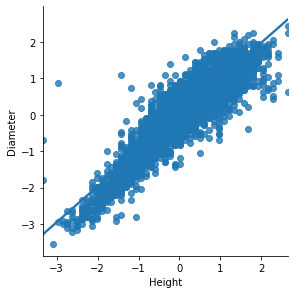

In [5]:
sns.lmplot(x="Height", y="Diameter",  height=4, aspect=1, data=X_scaled);

In [6]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print(X_scaled[0:5])
print(X_pca[0:5])


   Diameter    Height
0 -0.432097 -1.064297
1 -1.439757 -1.183837
2  0.122116 -0.107978
3 -0.432097 -0.347058
4 -1.540523 -1.422916
[[ 1.03109262  0.48936391]
 [ 1.85603893 -0.1015093 ]
 [-0.02288804  0.15646428]
 [ 0.5476616  -0.04047225]
 [ 2.09162006  0.00718482]]


In [7]:
# PC data frame creation from above 2D metrics 
comp_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns = comp_names, index=X_scaled.index)
X_pca[0:5]

,PC1,PC2
0,1.031093,0.489364
1,1.856039,-0.101509
2,-0.022888,0.156464
3,0.547662,-0.040472
4,2.091620,0.007185


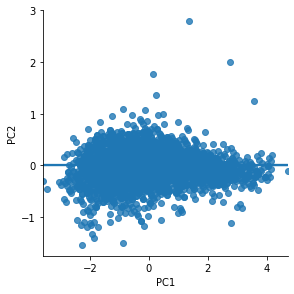

In [8]:
sns.lmplot(x=X_pca.columns[0], y=X_pca.columns[1],  height=4, aspect=1, data=X_pca);

In [9]:
pca.components_

array([[-0.73871623, -0.67401656],
       [ 0.67401656, -0.73871623]])

In [10]:
pd.DataFrame(pca.components_.T, columns=comp_names, index=X_scaled.columns )

,PC1,PC2
Diameter,-0.738716,0.674017
Height,-0.674017,-0.738716


# note : sum of weights*dimension != PC in this case why ?

There are two ways to use PCA in feature engineering.


1. As a descriptice technique. - Identify how to combine features to create new features.

2. PC themselfs as features. 



PCA for anomoly deduction: Unusual variation, not apperent in the original data will often show up in the low variance components. The component can be highly informative in anomaly or outlier deduction. 

principal components are uncorrelated components, hence can be used as features with the Algo which normally struggel with highly correlated features. 


## Problem with PCA

PC normally have no direct lelation with the realworld concept (what is PC5 in real world witch is some random weighted average of features), hence using PC as feature makes model even more unexplanable.




# -----------------------------------------------------------------------------------
## Using PCA as descriptive technique to discover features.



# -----------------------------------------------------------------------------------

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.feature_selection import mutual_info_regression

# setting up plot properties and helper functions

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores




In [12]:
df = pd.read_csv("./data/auto.csv")

# features for PCA
features = ["highway-mpg", "engine-size", "horsepower", "curb-weight"]

X = df.loc[:, features]
y = df.loc[:, 'price']

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [13]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [15]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(data=X_pca, columns=component_names, index = X_scaled.index )
X_pca.head()


,PC1,PC2,PC3,PC4
0,-0.041303,-0.561500,-0.078411,0.007346
1,1.733207,-0.641945,0.483000,-0.214762
2,1.446140,-0.267026,0.423689,-0.082684
3,2.487529,-0.981942,0.304724,0.388818
4,0.062568,-0.632038,0.076447,0.036389


In [16]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.487377,0.674586,-0.430971,0.348800
engine-size,0.500984,0.576444,-0.168591,-0.623140
horsepower,0.502647,-0.286315,-0.741524,0.339872
curb-weight,0.508748,0.361482,0.485782,0.611982


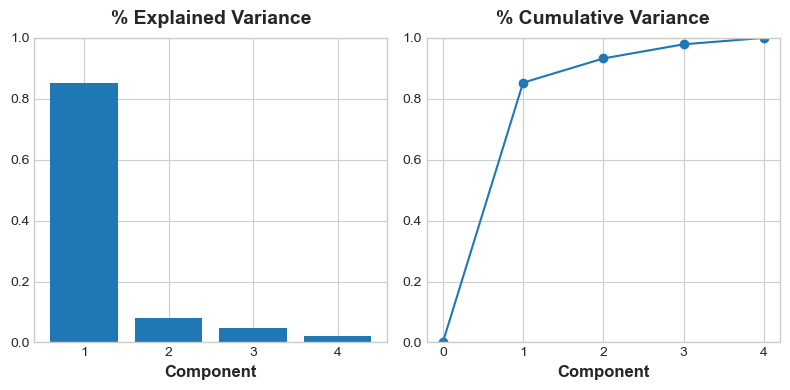

In [17]:
# Look at explained variance
plot_variance(pca);

In [18]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    1.014759
PC2    0.221472
PC3    0.186363
PC4    0.163194
Name: MI Scores, dtype: float64

In [19]:
#The third component shows a contrast between horsepower and curb_weight -- sports cars vs. wagons, it seems.

idx = X_pca["PC3"].sort_values(ascending=False).index
cols = ["make", "body-style", "horsepower", "curb-weight", "engine-size", "highway-mpg"]
df.loc[idx, cols]

,make,body-style,horsepower,curb-weight,engine-size,highway-mpg
114,toyota,wagon,62,3110,92,32
79,peugot,sedan,95,3075,120,24
81,peugot,sedan,97,3075,120,24
77,peugot,sedan,97,3020,120,24
113,toyota,wagon,62,2290,92,32
...,...,...,...,...,...,...
95,saab,hatchback,160,2808,121,26
74,nissan,hatchback,160,3071,181,25
8,chevrolet,hatchback,48,1488,61,53
19,honda,hatchback,58,1713,92,54


# PC1 captur most variance and has highest MI with Price. 

below is 

               PC1	      PC2	      PC3	     PC4
highway-mpg	-0.487377	0.674586	-0.430971	0.348800
engine-size	0.500984	0.576444	-0.168591	-0.623140
horsepower	0.502647	-0.286315	-0.741524	0.339872
curb-weight	0.508748	0.361482	0.485782	0.611982


The first component (PC1) shows a contrast between large, powerful vehicles with poor gas milage, and smaller, more economical vehicles with good gas milage. We might call this the "Luxury/Economy" axis. The next figure shows that our four chosen features mostly vary along the Luxury/Economy axis.

The third component shows a contrast between horsepower and curb_weight -- sports cars vs. wagons, it seems.

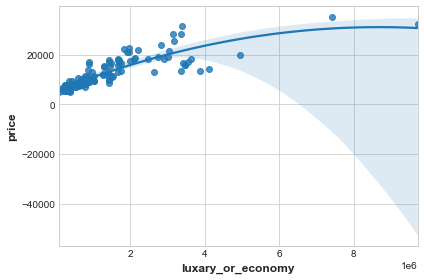

In [20]:

#PC1
df["luxary_or_economy"] = (df["engine-size"] * df["horsepower"] * df["curb-weight"] )/ df["highway-mpg"]

# PC3
df["sports_or_wagon"] = df["curb-weight"] / df["horsepower"]

df["price"] = y
sns.regplot(x="luxary_or_economy", y='price', data=df, order=2);

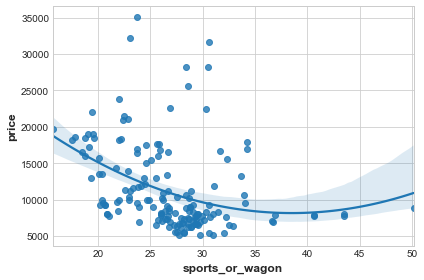

In [21]:
sns.regplot(x="sports_or_wagon", y='price', data=df, order=2);

## Exercise

